In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [ ]:
train_dir='/content/drive/MyDrive/Jackpot/outputimg/train'
test_dir='/content/drive/MyDrive/Jackpot/outputimg/val'

In [ ]:
img_width, img_height= 224,224

In [ ]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,1), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 10, activation = 'softmax'))
Classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               11944064  
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)


In [ ]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 color_mode ='grayscale',
                                                 class_mode = 'categorical')

Found 1513 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            color_mode='grayscale',
                                            class_mode = 'categorical')

Found 506 images belonging to 10 classes.


In [ ]:
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
10/48 [=====>........................] - ETA: 1:15 - loss: 2.2734 - accuracy: 0.1969

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


48/48 [==============================] - 107s 2s/step - loss: 2.2198 - accuracy: 0.1745 - val_loss: 2.0558 - val_accuracy: 0.1719
Epoch 2/30
48/48 [==============================] - 107s 2s/step - loss: 1.8355 - accuracy: 0.3325 - val_loss: 1.6954 - val_accuracy: 0.4526
Epoch 3/30
48/48 [==============================] - 108s 2s/step - loss: 1.2528 - accuracy: 0.5955 - val_loss: 1.5176 - val_accuracy: 0.5968
Epoch 4/30
48/48 [==============================] - 108s 2s/step - loss: 0.8677 - accuracy: 0.7046 - val_loss: 0.6020 - val_accuracy: 0.8300
Epoch 5/30
48/48 [==============================] - 107s 2s/step - loss: 0.6572 - accuracy: 0.7759 - val_loss: 0.5246 - val_accuracy: 0.7964
Epoch 6/30
48/48 [==============================] - 108s 2s/step - loss: 0.4352 - accuracy: 0.8526 - val_loss: 0.5375 - val_accuracy: 0.8123
Epoch 7/30
48/48 [==============================] - 108s 2s/step - loss: 0.3572 - accuracy: 0.8857 - val_loss: 0.2857 - val_accuracy: 0.8992
Epoch 8/30
48/48 [======

In [ ]:
r.history

{'accuracy': [0.17448776960372925,
  0.33245208859443665,
  0.5955055952072144,
  0.7045604586601257,
  0.7759418487548828,
  0.85261070728302,
  0.8856576085090637,
  0.9101123809814453,
  0.9312623739242554,
  0.935888946056366,
  0.9418374300003052,
  0.9510905742645264,
  0.9517514705657959,
  0.9550561904907227,
  0.9603436589241028,
  0.9636483788490295,
  0.9610046148300171,
  0.9715796709060669,
  0.9583608508110046,
  0.9689359068870544,
  0.9656311869621277,
  0.9636483788490295,
  0.9636483788490295,
  0.9629874229431152,
  0.9656311869621277,
  0.9715796709060669,
  0.9729015231132507,
  0.9623265266418457,
  0.9676139950752258,
  0.9629874229431152],
 'loss': [2.2198498249053955,
  1.8355406522750854,
  1.2528032064437866,
  0.8676826357841492,
  0.6572453379631042,
  0.4352179765701294,
  0.3571968078613281,
  0.2751031517982483,
  0.22072213888168335,
  0.1996430903673172,
  0.19830773770809174,
  0.14164090156555176,
  0.13946929574012756,
  0.12397828698158264,
  0.114

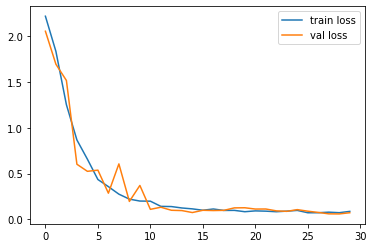

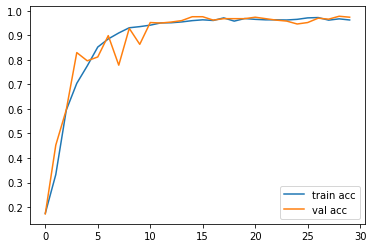

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

Classifier.save('model_Classifierf.h5')

In [ ]:
y_pred = Classifier.predict(test_set)

In [ ]:
y_pred

array([[7.9321524e-04, 1.9665074e-05, 9.6352637e-01, ..., 6.4151941e-11,
        6.0141820e-06, 1.3441567e-07],
       [3.6441324e-06, 1.8207217e-07, 1.2457329e-07, ..., 2.2019468e-02,
        5.3412959e-06, 3.7947714e-07],
       [2.3798100e-03, 2.1841186e-03, 1.2057470e-06, ..., 1.5419713e-04,
        6.6557911e-04, 9.2650100e-04],
       ...,
       [5.1163466e-11, 1.5673640e-13, 2.9861431e-15, ..., 7.0522322e-19,
        9.0974707e-11, 8.1536755e-15],
       [2.1634317e-08, 4.6283763e-10, 5.6576244e-14, ..., 1.6638791e-03,
        2.8978242e-09, 3.8703318e-11],
       [7.3562074e-01, 2.4626419e-01, 2.7178979e-07, ..., 4.1143721e-08,
        1.1012696e-03, 5.0264725e-04]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 6, 3, 3, 4, 9, 3, 2, 3, 8, 0, 7, 2, 4, 5, 8, 5, 4, 2, 7, 0, 2,
       5, 0, 4, 4, 5, 2, 3, 4, 4, 7, 0, 3, 2, 7, 2, 7, 0, 3, 0, 2, 0, 5,
       2, 9, 3, 2, 2, 4, 0, 2, 2, 4, 3, 1, 8, 3, 5, 7, 5, 3, 9, 4, 5, 4,
       3, 2, 5, 1, 4, 1, 7, 3, 4, 3, 3, 3, 2, 6, 3, 4, 7, 5, 5, 2, 2, 4,
       9, 9, 2, 5, 0, 5, 0, 2, 1, 3, 2, 3, 5, 2, 5, 3, 5, 3, 7, 5, 5, 4,
       1, 2, 7, 2, 1, 8, 5, 3, 2, 0, 6, 9, 4, 7, 4, 3, 2, 4, 3, 5, 2, 0,
       7, 4, 0, 5, 5, 2, 3, 7, 1, 4, 7, 1, 5, 0, 6, 3, 4, 4, 8, 7, 7, 2,
       4, 6, 2, 9, 2, 2, 0, 9, 9, 2, 4, 2, 1, 4, 8, 1, 1, 5, 5, 5, 3, 2,
       5, 4, 5, 8, 5, 2, 1, 5, 9, 1, 5, 3, 1, 5, 0, 0, 0, 2, 9, 7, 0, 5,
       7, 6, 7, 3, 3, 9, 1, 2, 4, 2, 0, 4, 2, 4, 3, 4, 9, 5, 8, 5, 4, 2,
       5, 8, 2, 5, 4, 0, 2, 6, 7, 3, 4, 5, 7, 8, 4, 2, 4, 3, 5, 2, 2, 4,
       5, 3, 5, 9, 2, 3, 1, 5, 8, 3, 4, 3, 2, 4, 3, 3, 4, 3, 1, 1, 2, 4,
       5, 6, 8, 2, 1, 3, 7, 5, 9, 2, 4, 3, 5, 9, 4, 9, 5, 1, 5, 5, 9, 1,
       3, 6, 3, 1, 2, 4, 2, 5, 2, 8, 0, 6, 5, 0, 3,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_Classifierf.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/BDA/50(10).jpg',target_size=(224,224),color_mode='grayscale')

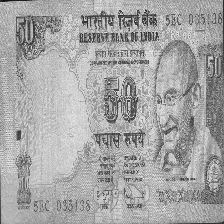

In [ ]:
img

In [ ]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [ ]:
result = Classifier.predict(test_image)
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(test_image), axis=1)

In [ ]:
for i in a:
  print(i)

8


In [ ]:
model.evaluate(test_set)

16/16 [==============================] - 15s 870ms/step - loss: 0.0720 - accuracy: 0.9743


[0.0719996988773346, 0.9743083119392395]

In [ ]:
model.evaluate(training_set)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/48 [=====>........................] - ETA: 36s - loss: 0.1045 - accuracy: 0.9563

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


48/48 [==============================] - 48s 990ms/step - loss: 0.1140 - accuracy: 0.9537


[0.11397947371006012, 0.953734278678894]